# What is K-means clustering
Today I will be utilizing the sklearn library to demonstrate k-means clustering algorithm. Also known as Lloyd's algorithm, K-means has three primary steps:

1) The First step is to initialize the Centroids  
These centroids are merely the seeds/starting points for the next two steps  

2) Assign each sample to the nearest centroid  
This forms the clusters    

3) Create a new centroid by taking the mean value of all samples connected to that centroid  
This moves the centroids thus changing the clusters   

4) Repeat Step 2  
   
This is repeated until the change in the clusters is less then a minimum threshold. [1]

As one can probubly tell this algorithm has some drawbacks. 

For one, clusters are always assumed to be convex and elipse shaped. This is a result of calculating cluster association soley based upon the samples distance from the centroid. This prevents k-means from recognizing elongated and irregular clusters.

Secondly, K-means performs poorly in extreamly high dimensional space. As Euclidean distances become inflated (as they do in high dimensions) minimizing interia, the within-cluster sum of square criterions) becomes difficult. Minimizing inertia is, after all, the main metric k-means trys to reduce and is the measusuring stick of how well the algorithm is performing. [1]

While running a dimensionality reduction algorithm such as PCA can alleviate some of the dimension creep and speed up computation, it it ultimately a way of treating a symptom, not an underlying algorithmic design issue. [1]

# Data Aquistion

*NOTE:  
This example was a complete failure.
Below are the hours I wasted setting up and running kmeans on NHL data only to realise that the data was too discrete and had too few unique values to pull any meaningful data out of a K-means cluster analysis. After this section I re-attempted using data_sets built into sklearn to demonstrate kmeans and  #INSET SECOND ALG HERE#*

Using Kaggle I found a great high-dimensional data set that recorded NHL Game Data.
Lets import it into a numpy array and take a peek.

In [3]:
import numpy as np 

csv = np.genfromtxt('game.csv', delimiter= ",") 

game_data = csv[1:] 

print(game_data[0])

[nan nan nan nan nan nan  2.  3. nan nan nan nan nan -4. nan]


In [4]:
a = np.ones((4,1))
b = np.hstack((a,a*2)) 

print b.shape 
print b

(4L, 2L)
[[1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]]


Well thats not right. A majority of the entries should be numbers not NaNs.
Upon further inspection in notepad...  
`"2012030221","20122013","P",2013-05-16,"3","6",2,3,"home win OT","left","TD Garden","/api/v1/venues/null","America/New_York",-4,"EDT"`  
... it appears most numerical values are stored as strings

While this is most likely something that can be remedied with numpy, it's much easier to use pandas' dataframe and utilities for such a task.

In [44]:
import pandas as pd
df = pd.read_csv('game.csv')
df

,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2012030221,20122013,P,2013-05-16,3,6,2,3,home win OT,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT
1,2012030222,20122013,P,2013-05-19,3,6,2,5,home win REG,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT
2,2012030223,20122013,P,2013-05-21,6,3,2,1,away win REG,right,Madison Square Garden,/api/v1/venues/null,America/New_York,-4,EDT
3,2012030224,20122013,P,2013-05-23,6,3,3,4,home win OT,right,Madison Square Garden,/api/v1/venues/null,America/New_York,-4,EDT
4,2012030225,20122013,P,2013-05-25,3,6,1,3,home win REG,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT
5,2012030311,20122013,P,2013-06-02,6,5,3,0,away win REG,left,CONSOL Energy Center,/api/v1/venues/null,America/New_York,-4,EDT
6,2012030312,20122013,P,2013-06-04,6,5,6,1,away win REG,left,CONSOL Energy Center,/api/v1/venues/null,America/New_York,-4,EDT
7,2012030313,20122013,P,2013-06-06,5,6,1,2,home win OT,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT
8,2012030314,20122013,P,2013-06-08,5,6,0,1,home win REG,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT
9,2012030231,20122013,P,2013-05-16,17,16,1,4,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT


Here's the raw data, but there is a lot of timezone and venue information that is redundent or not needed for this analysis. So, lets chop it out.

In [45]:
import pandas as pd
#data = pd.read_csv('game.csv')

data_pd = pd.read_csv("game.csv",
                      usecols=["season","type","away_team_id","home_team_id",
                               "away_goals","home_goals","outcome","home_rink_side_start"])
print (data_pd)

        season type  away_team_id  home_team_id  away_goals  home_goals  \
0     20122013    P             3             6           2           3   
1     20122013    P             3             6           2           5   
2     20122013    P             6             3           2           1   
3     20122013    P             6             3           3           4   
4     20122013    P             3             6           1           3   
5     20122013    P             6             5           3           0   
6     20122013    P             6             5           6           1   
7     20122013    P             5             6           1           2   
8     20122013    P             5             6           0           1   
9     20122013    P            17            16           1           4   
10    20122013    P            17            16           4           1   
11    20122013    P            16            17           1           3   
12    20122013    P      

Better, we now have the data we want, but still need to do some prep before running the analysis. There are plenty of string data of which there are only a hand full of unique data in several column (`type`, `outcome`, and `home_rink_side_start`) Let's enumerate those guys for easy analysis by building dictioarys with the target strings as keys.

In [46]:
#changing strings to enums
type_e = {'P':1, "R":0} # P = playoff, R = regular season
outcome_e = {'home win REG':1, 'away win REG':11, # hopefully enough space to help clustering alg
             'home win OT':2,  'away win OT':12,  
             'home win SO':3,  'away win SO':13}  
side_start_e = {'left':0, 'right':1}

data_pd['type'] = data_pd['type'].apply(type_e.get)
data_pd['outcome'] = data_pd['outcome'].apply(outcome_e.get)
data_pd['home_rink_side_start'] = data_pd['home_rink_side_start'].apply(side_start_e.get)

print (data_pd)

        season  type  away_team_id  home_team_id  away_goals  home_goals  \
0     20122013     1             3             6           2           3   
1     20122013     1             3             6           2           5   
2     20122013     1             6             3           2           1   
3     20122013     1             6             3           3           4   
4     20122013     1             3             6           1           3   
5     20122013     1             6             5           3           0   
6     20122013     1             6             5           6           1   
7     20122013     1             5             6           1           2   
8     20122013     1             5             6           0           1   
9     20122013     1            17            16           1           4   
10    20122013     1            17            16           4           1   
11    20122013     1            16            17           1           3   
12    201220

Now that all the data is formatted we can drop all of the incomplete data. Any row that is missing a data point or has a NaN will be removed.

In [47]:
# drop all rows that have incomplete data
data_pd.dropna(how='any',inplace = True)
print (data_pd)

        season  type  away_team_id  home_team_id  away_goals  home_goals  \
0     20122013     1             3             6           2           3   
1     20122013     1             3             6           2           5   
2     20122013     1             6             3           2           1   
3     20122013     1             6             3           3           4   
4     20122013     1             3             6           1           3   
5     20122013     1             6             5           3           0   
6     20122013     1             6             5           6           1   
7     20122013     1             5             6           1           2   
8     20122013     1             5             6           0           1   
9     20122013     1            17            16           1           4   
10    20122013     1            17            16           4           1   
11    20122013     1            16            17           1           3   
12    201220

In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

%matplotlib inline

Next we have to choose how many clusters we want to use. I will choose two because in hockey there is always one winner and one loser. So by limiting my clusters to two we  might be able to find trends that predict a winner or loser.

In [49]:
clustering = KMeans(n_clusters=2, random_state = 14)
clustering.fit(data_pd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=14, tol=0.0001, verbose=0)

In [50]:
data_df = pd.DataFrame(data_pd)

#extra colors if you want to expand the num of clusters
color_theme = np.array(['purple','lightsalmon','powderblue','mediumseagreen',
                        'darkgrey','lightcoral','peru','olive'])


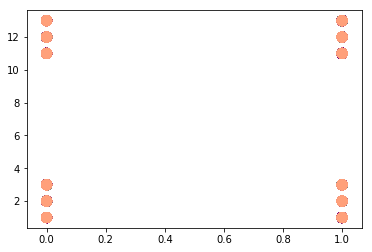

In [51]:
plt.scatter(x=data_df.home_rink_side_start,y=data_df.outcome, c=color_theme[clustering.labels_], s=100)

Well, the data is discrete which means that one can only see the top values, lets add in some jitter to fix that.

In [52]:
def rand_jitter(arr):
    stdev = .0125*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def jitter(x, y, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs):
    return plt.scatter(rand_jitter(x), rand_jitter(y), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, verts=verts, hold=hold, **kwargs)

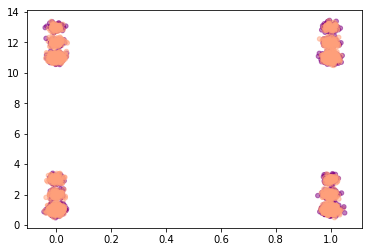

In [53]:
jitter(x=data_df.home_rink_side_start,y=data_df.outcome, c=color_theme[clustering.labels_], s=20, alpha=0.5)

Now some of the other cluster is showing through. Because we now have a way of graphing any two dimensions within our data set, lets graph them all and see if the clusters tell us anything meaningful.

Now there are 8 features within our DataFrame and we are only chosing two at a time. This is a simple n choose k problem with n being 8 and k being 2. 

(n= \_\_n!\_\_ = \_8!\_ =28  
k)=   k!(n-k)! = 2!\*6! =  

So there are 28 combinations.

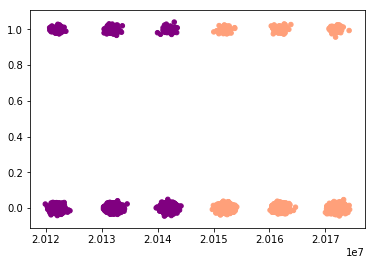

In [60]:
col_names = ["season","type","away_team_id","home_team_id",
             "away_goals","home_goals","outcome","home_rink_side_start"]

jitter(x=data_df[col_names[0]],y=data_df[col_names[1]], c=color_theme[clustering.labels_], s=20)

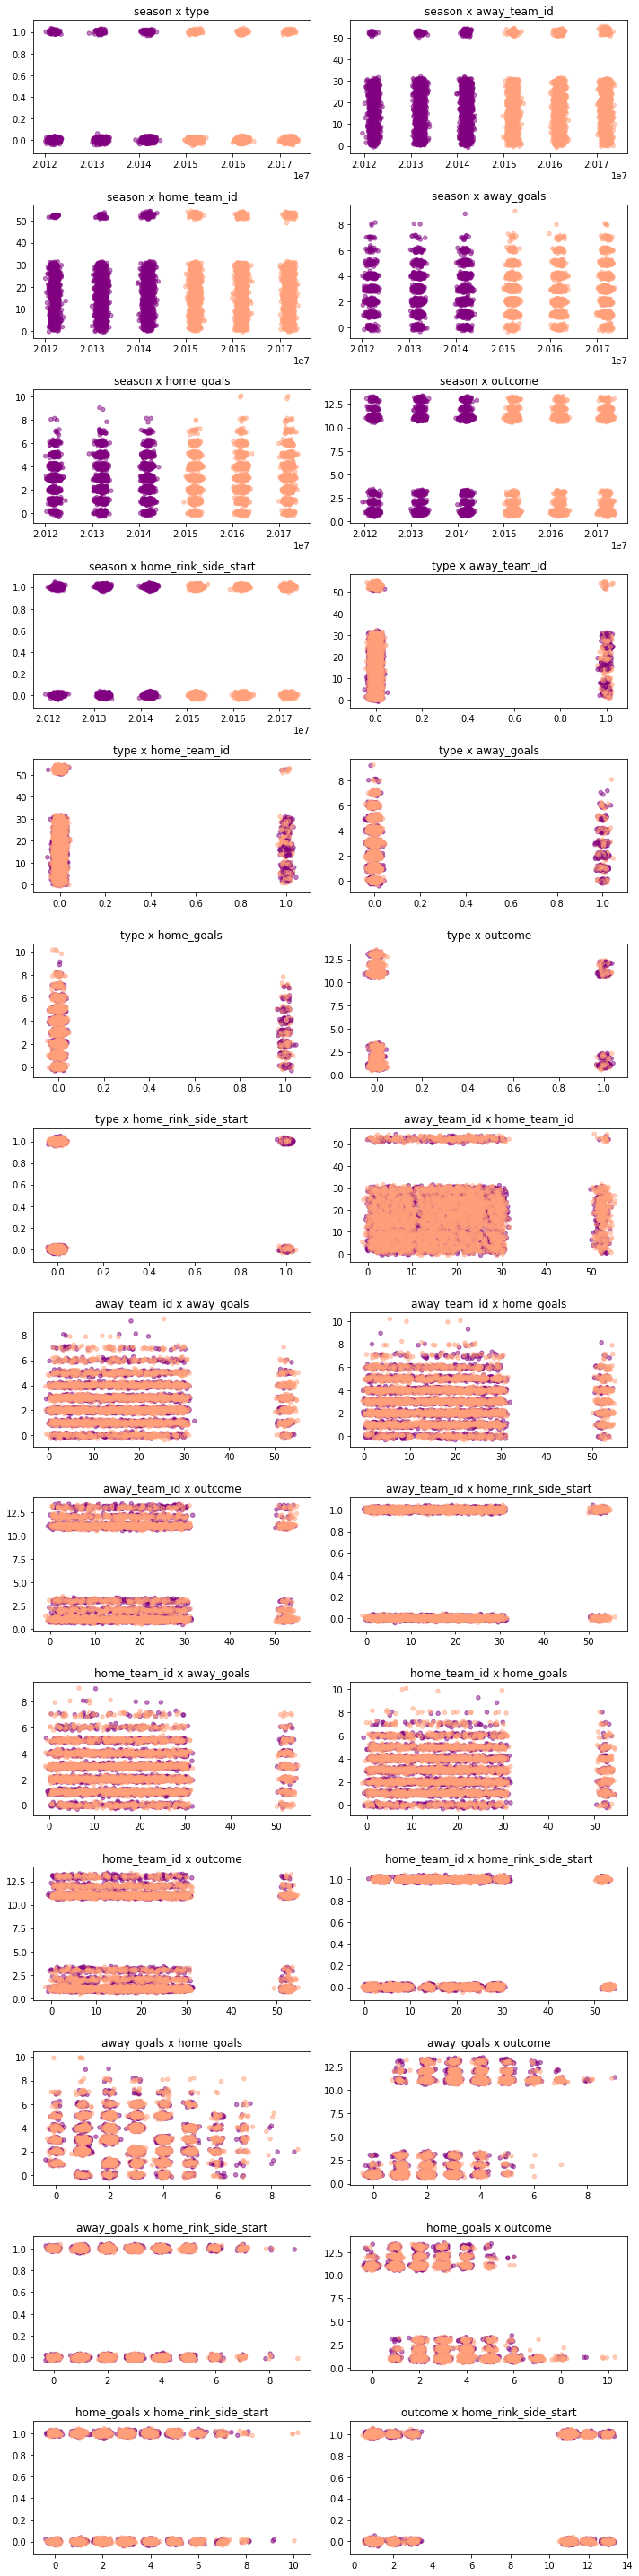

In [61]:
col_names = ["season","type","away_team_id","home_team_id",
             "away_goals","home_goals","outcome","home_rink_side_start"]

f = plt.figure(figsize=(10,40))

x = 1
i = 0
j = 1

while(x<=28):
    ax = f.add_subplot(14,2,x)
    jitter(x=data_df[col_names[i]],y=data_df[col_names[j]], c=color_theme[clustering.labels_], s=20, alpha=0.5)
    ax.set_title(col_names[i]+' x '+col_names[j])
    j += 1
    if j == len(col_names):
        i += 1
        j = i + 1
    x += 1
        
f.tight_layout()

What I'm seeing here is that the kmeans has only seemed to cluster based on the season numbers, hence why the first 7 graphs (all of which have the season as a dimension) are perfectly clustered. Let's try this again without the season data included.

In [62]:
new_data_pd = data_pd[["type","away_team_id","home_team_id",
             "away_goals","home_goals","outcome","home_rink_side_start"]].copy()
print new_data_pd

      type  away_team_id  home_team_id  away_goals  home_goals  outcome  \
0        1             3             6           2           3        2   
1        1             3             6           2           5        1   
2        1             6             3           2           1       11   
3        1             6             3           3           4        2   
4        1             3             6           1           3        1   
5        1             6             5           3           0       11   
6        1             6             5           6           1       11   
7        1             5             6           1           2        2   
8        1             5             6           0           1        1   
9        1            17            16           1           4        1   
10       1            17            16           4           1       11   
11       1            16            17           1           3        1   
12       1            16 

In [63]:
new_clustering = KMeans(n_clusters=2, random_state = 14)
new_clustering.fit(new_data_pd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=14, tol=0.0001, verbose=0)

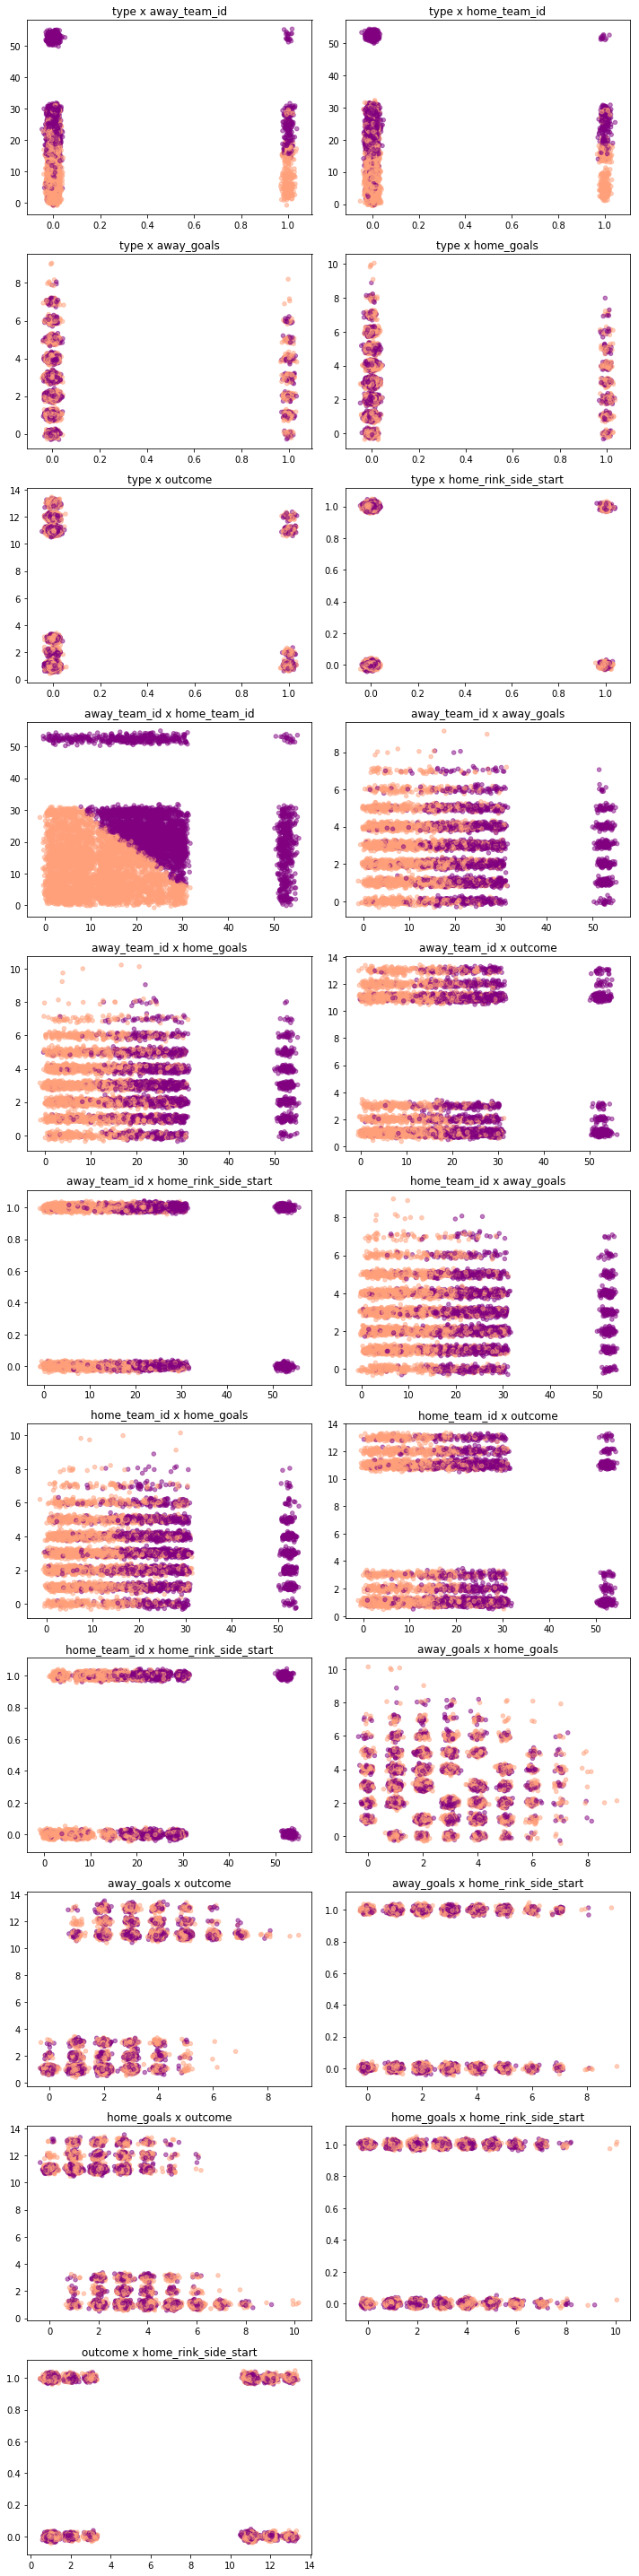

In [64]:
col_names = ["type","away_team_id","home_team_id",
             "away_goals","home_goals","outcome","home_rink_side_start"]

f = plt.figure(figsize=(10,40))

x = 1
i = 0
j = 1

while(x<=21):
    ax = f.add_subplot(11,2,x)
    jitter(x=new_data_pd[col_names[i]],y=new_data_pd[col_names[j]], c=color_theme[new_clustering.labels_], s=20, alpha=0.5)
    ax.set_title(col_names[i]+' x '+col_names[j])
        
    j += 1
    if j == len(col_names):
        i += 1
        j = i + 1
    x += 1
    
f.tight_layout()

Once the season are removed we run into a new issue. The k-means now only seems to cluster around teams based up their team id. This is because we give the algorithem the chance to compare home_team_id vs away_team_id. Unfortunately its not even in a truely meaningful manner. One color does not represent the home teams performance vs the away teams performance. The cluster is just arbitrary based upon the seed start location.  

### Eureka!!!
I realised I could force the k-means algorithem to perform the cluster analysis based on my own subset of the dataframe dimensions. This allows me to narrow the dimensions to the ones that are relveant to a team winning while looking out for any other emergent paterns. So lets perform a cluster analysis on the home goals, away goals, and game outcome.

In [65]:
new_data_pd = data_pd[["type","away_team_id","home_team_id",
             "away_goals","home_goals","outcome","home_rink_side_start"]].copy()
print new_data_pd

      type  away_team_id  home_team_id  away_goals  home_goals  outcome  \
0        1             3             6           2           3        2   
1        1             3             6           2           5        1   
2        1             6             3           2           1       11   
3        1             6             3           3           4        2   
4        1             3             6           1           3        1   
5        1             6             5           3           0       11   
6        1             6             5           6           1       11   
7        1             5             6           1           2        2   
8        1             5             6           0           1        1   
9        1            17            16           1           4        1   
10       1            17            16           4           1       11   
11       1            16            17           1           3        1   
12       1            16 

In [68]:
new_clustering = KMeans(n_clusters=2, random_state = 14)
new_clustering.fit(new_data_pd[['home_goals','away_goals','outcome']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=14, tol=0.0001, verbose=0)

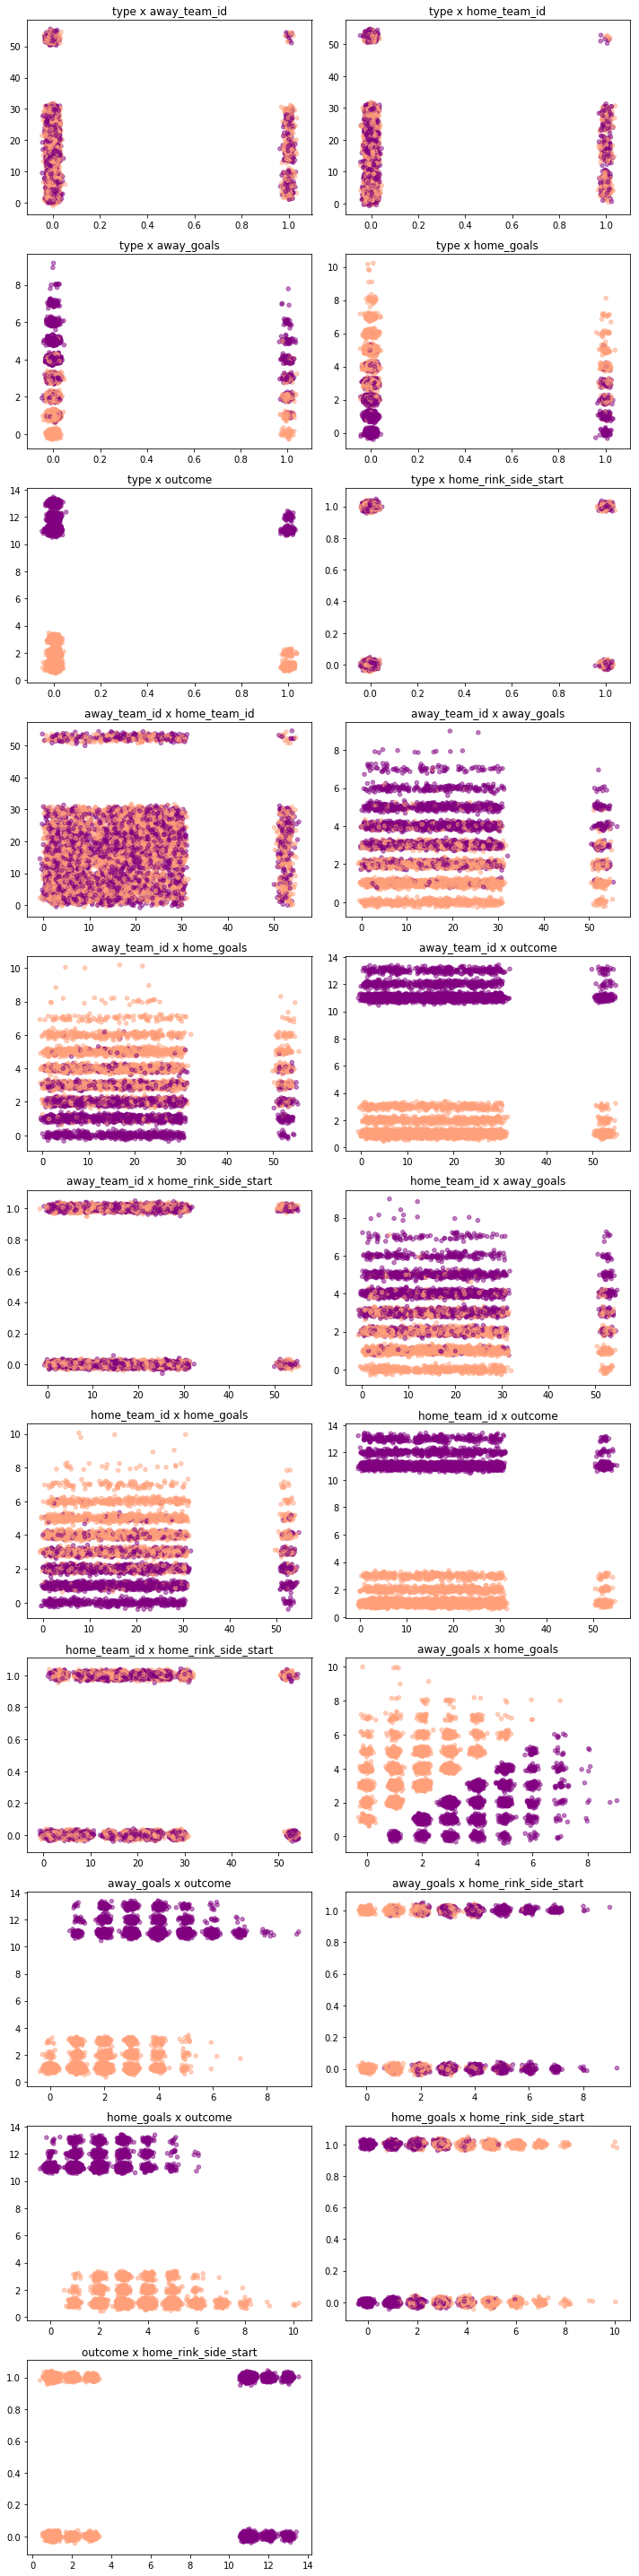

In [69]:
col_names = ["type","away_team_id","home_team_id",
             "away_goals","home_goals","outcome","home_rink_side_start"]

f = plt.figure(figsize=(10,40))

x = 1
i = 0
j = 1

while(x<=21):
    ax = f.add_subplot(11,2,x)
    jitter(x=new_data_pd[col_names[i]],y=new_data_pd[col_names[j]], c=color_theme[new_clustering.labels_], s=20, alpha=0.5)
    ax.set_title(col_names[i]+' x '+col_names[j])
        
    j += 1
    if j == len(col_names):
        i += 1
        j = i + 1
    x += 1
    
f.tight_layout()

The cluster have very clearly formed based on the outcome of the game. This is clearly seen when looking at all of the graphs with the outcome. (As shown below)  

For reference:  
1 = Home Regular Win  
2 = Home Overtime Win  
3 = Home Shoot Out Win  
11 = Away Regular Win  
12 = Away Overtime Win  
13 = Away Shoot Out Win  

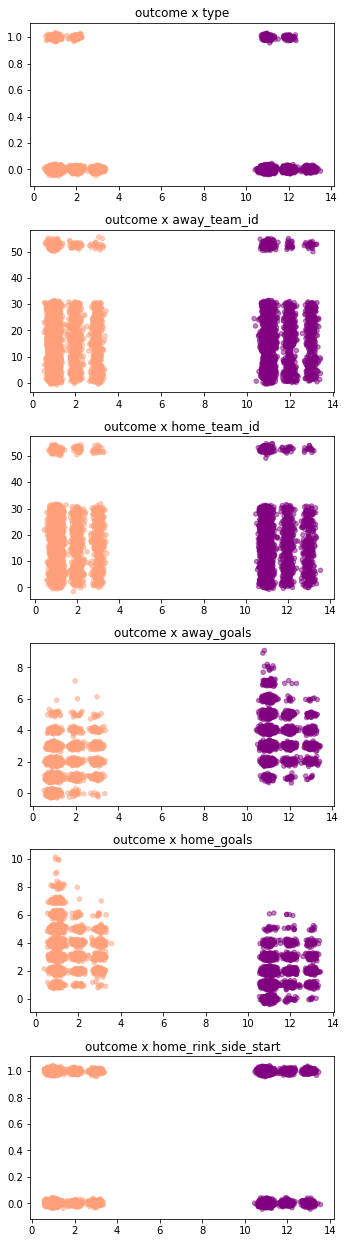

In [75]:
f = plt.figure(figsize=(5,20))

x = 0
y = 1

while x < 7:
    if x == 5:
        x += 1
        continue
    ax = f.add_subplot(7,1,y)
    jitter(x=new_data_pd[col_names[5]],y=new_data_pd[col_names[x]], 
           c=color_theme[new_clustering.labels_], s=20, alpha=0.5)
    ax.set_title(col_names[5]+' x '+col_names[x])
    x += 1
    y += 1
    
f.tight_layout()

With clusters beging completely outcome dependent, this does show some interesting trends though in other bisections of our data.

Remeber Orange is the Home winning while Purple is the Away winning.

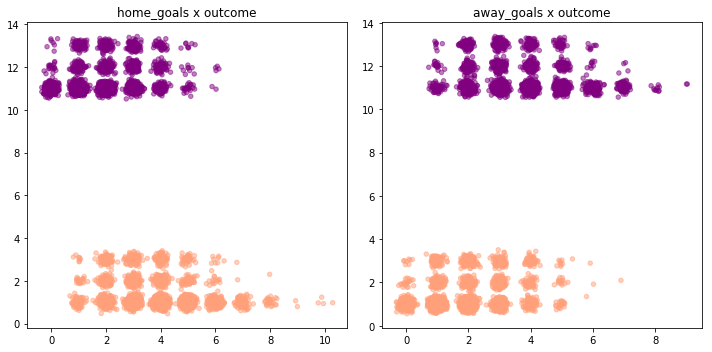

In [80]:
f = plt.figure(figsize=(10,5))


ax = f.add_subplot(1,2,1)
jitter(x=new_data_pd['home_goals'],y=new_data_pd['outcome'], 
       c=color_theme[new_clustering.labels_], s=20, alpha=0.5)
ax.set_title('home_goals'+' x '+'outcome')

ax = f.add_subplot(1,2,2)
jitter(x=new_data_pd['away_goals'],y=new_data_pd['outcome'], 
       c=color_theme[new_clustering.labels_], s=20, alpha=0.5)
ax.set_title('away_goals'+' x '+'outcome')

    
f.tight_layout()

Now after looking at these graphs you might be thinking, "WOW, more goals equal more wins, who would have guessed" but there are somethings to be learned from here.

This graph pair illustrates the difference between goals needed to win at home vs win while away. Scoreing 1 goal or less at home seems to be a lost battle most of the time. However scoring 6 or more goals at home makes it near impossible for your opponents to comeback. This is contrary to the away stats, were it seems that winning while away consistently requires 3 goals. But if you score 5 while away, the home team has little chance at coming back.  

## Conclusion (sort of)

I am aware my analysis doesn't utilize the clustering well to find emergent trends, but for that I blame mostly my data. While I did utilize a large, high dimensional dataset, the data itself wasn't diverse enough. I should have known as I started to enumerate some of the string values that this dataset does not contain diverse data. I am fairly certain that beside the game_id and team_id columns the most unique data points in any one of the dataset's feature columns is 10. I believe if I would have analyized a dataset more continuous in nature I could have had a better chance at finding emergent properties with the K-means algorithm.  

Aside from the poor dataset I will also chalk up some of the disapointment to the nature of clustering investigation. A cluster algorithm will not always yield you results or any truely emergent properties. And even if there are properties to discover, you could be utilizing the wrong clustering algorithm based on the nature of the data. Making that judgement call is not something I have the knowledge to make which is why I choose the K-means algorithem on a whim instead of with a real purpose or reason. It was just the algorithm I thought I understood the most.  

Below I took another crack at K-means and #insert new alg here# but utilizing built in sample data as to not make the same mistake again. I know this goes a little against the spirit of the homework, but I wish to demostrate my ability to effectively utilize these clustering algorithms while controling for poor dataset choice.

## Iris Dataset
Here we will be using K-means to investigate the iris sample dataset.
It is a classic and simple dataset to analyize with clustering because of it's three classes. [5]

In [203]:
iris = datasets.load_iris()

#scaling test dataset for k-means alg
test_data = scale(iris.data)
#setting control
control_data = pd.DataFrame(iris.target)

variable_names = iris.feature_names

With the data set up, lets perform the K-Means calculation and graph our results

In [210]:
clustering = KMeans(n_clusters=3,random_state=0)
clustering.fit(test_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

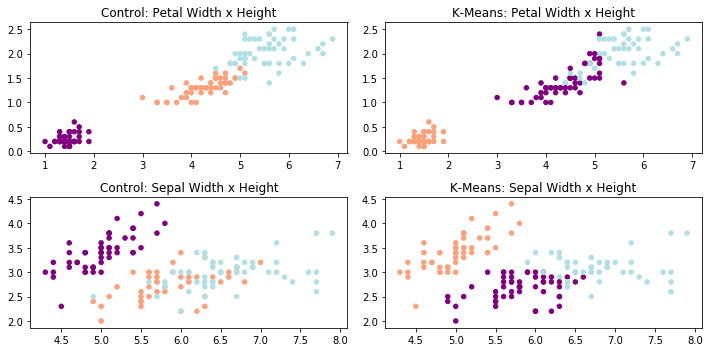

In [211]:
iris_pd = pd.DataFrame(iris.data)

iris_pd.columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
control_data.columns = ['Targets']

f = plt.figure(figsize=(10,5))

ax = f.add_subplot(2,2,1)
plt.scatter(x=iris_pd.Petal_Length, y=iris_pd.Petal_Width, c=color_theme[iris.target], s=20)
ax.set_title('Control: Petal Width x Height')

ax = f.add_subplot(2,2,2)
plt.scatter(x=iris_pd.Petal_Length, y=iris_pd.Petal_Width, c=color_theme[clustering.labels_], s=20)
ax.set_title('K-Means: Petal Width x Height')

ax = f.add_subplot(2,2,3)
plt.scatter(x=iris_pd.Sepal_Length, y=iris_pd.Sepal_Width, c=color_theme[iris.target], s=20)
ax.set_title('Control: Sepal Width x Height')

ax = f.add_subplot(2,2,4)
plt.scatter(x=iris_pd.Sepal_Length, y=iris_pd.Sepal_Width, c=color_theme[clustering.labels_], s=20)
ax.set_title('K-Means: Sepal Width x Height')

f.tight_layout()

Looks like the clusters are mixed up in our k-means classification as compared to the target. Let's just relabel those.

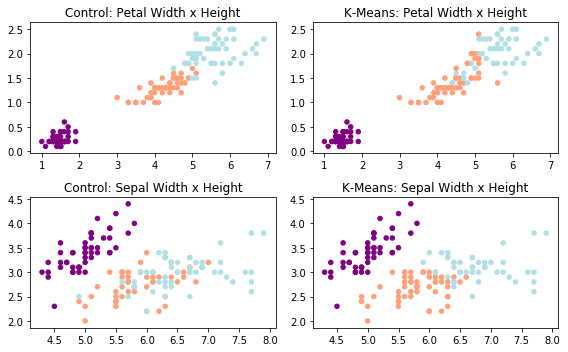

In [213]:
relabel = np.choose(clustering.labels_,[1,0,2]).astype(np.int64)

f = plt.figure(figsize=(8,5))

ax = f.add_subplot(2,2,1)
plt.scatter(x=iris_pd.Petal_Length, y=iris_pd.Petal_Width, c=color_theme[iris.target], s=20)
ax.set_title('Control: Petal Width x Height')

ax = f.add_subplot(2,2,2)
plt.scatter(x=iris_pd.Petal_Length, y=iris_pd.Petal_Width, c=color_theme[relabel], s=20)
ax.set_title('K-Means: Petal Width x Height')

ax = f.add_subplot(2,2,3)
plt.scatter(x=iris_pd.Sepal_Length, y=iris_pd.Sepal_Width, c=color_theme[iris.target], s=20)
ax.set_title('Control: Sepal Width x Height')

ax = f.add_subplot(2,2,4)
plt.scatter(x=iris_pd.Sepal_Length, y=iris_pd.Sepal_Width, c=color_theme[relabel], s=20)
ax.set_title('K-Means: Sepal Width x Height')

f.tight_layout()

Now that the clusters are relabeled, we can print out the classification report to see how accurate our K-Means classification was. While this is only something you can do with known test data, it is still useful for improving one's effectiveness with clustering algorithms.

In [214]:
print(classification_report(control_data, relabel))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.74      0.78      0.76        50
          2       0.77      0.72      0.74        50

avg / total       0.83      0.83      0.83       150



An average of 83% is good, but surely we can do better. Upon looking at the previous set of graphs, a pattern seems apparent. The clusters on the control seem to be far more dependent on the Petal measurements as opposed to the Sepal measurements, whereas the K-means clusters seem to be too dependent on the Sepal measurements.  

Let us redo this experiment, but this time only running our algorithm on the Petal measurements.

In [215]:
test_data_pd = pd.DataFrame(test_data)
test_data_pd.columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
clustering = KMeans(n_clusters=3,random_state=0)
clustering.fit(test_data_pd[['Petal_Width','Petal_Length']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

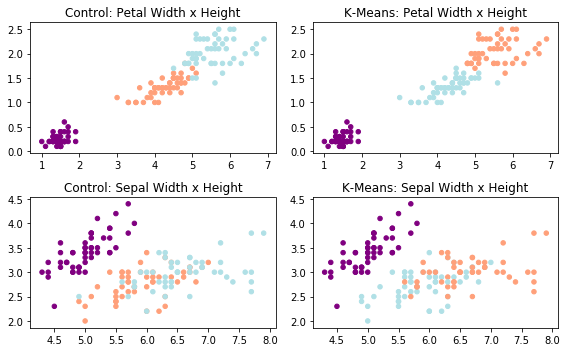

In [216]:
f = plt.figure(figsize=(8,5))

ax = f.add_subplot(2,2,1)
plt.scatter(x=iris_pd.Petal_Length, y=iris_pd.Petal_Width, c=color_theme[iris.target], s=20)
ax.set_title('Control: Petal Width x Height')

ax = f.add_subplot(2,2,2)
plt.scatter(x=iris_pd.Petal_Length, y=iris_pd.Petal_Width, c=color_theme[clustering.labels_], s=20)
ax.set_title('K-Means: Petal Width x Height')

ax = f.add_subplot(2,2,3)
plt.scatter(x=iris_pd.Sepal_Length, y=iris_pd.Sepal_Width, c=color_theme[iris.target], s=20)
ax.set_title('Control: Sepal Width x Height')

ax = f.add_subplot(2,2,4)
plt.scatter(x=iris_pd.Sepal_Length, y=iris_pd.Sepal_Width, c=color_theme[clustering.labels_], s=20)
ax.set_title('K-Means: Sepal Width x Height')

f.tight_layout()

A quick relabel just like before...

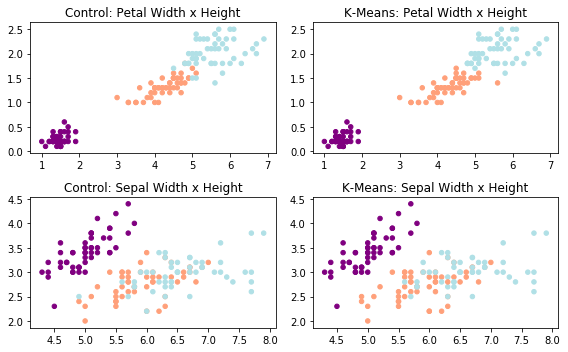

In [217]:
relabel = np.choose(clustering.labels_,[0,2,1]).astype(np.int64)

f = plt.figure(figsize=(8,5))

ax = f.add_subplot(2,2,1)
plt.scatter(x=iris_pd.Petal_Length, y=iris_pd.Petal_Width, c=color_theme[iris.target], s=20)
ax.set_title('Control: Petal Width x Height')

ax = f.add_subplot(2,2,2)
plt.scatter(x=iris_pd.Petal_Length, y=iris_pd.Petal_Width, c=color_theme[relabel], s=20)
ax.set_title('K-Means: Petal Width x Height')

ax = f.add_subplot(2,2,3)
plt.scatter(x=iris_pd.Sepal_Length, y=iris_pd.Sepal_Width, c=color_theme[iris.target], s=20)
ax.set_title('Control: Sepal Width x Height')

ax = f.add_subplot(2,2,4)
plt.scatter(x=iris_pd.Sepal_Length, y=iris_pd.Sepal_Width, c=color_theme[relabel], s=20)
ax.set_title('K-Means: Sepal Width x Height')

f.tight_layout()

In [218]:
print(classification_report(y, relabel))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.92      0.96      0.94        50
          2       0.96      0.92      0.94        50

avg / total       0.96      0.96      0.96       150



Now look at those results. By modifying what parts of test data the K-Means algorithm considered we have improved the accuracy of our classification by 13%. This definately shows how effective k-mean can be at identifying trends and emergent patterns. This is also a two way street, as narrowing down the parameters to ones which we believe are more closely related can improve the performace of K-Means in higher dimensional datasets.

## Spectral Clustering

Spectral Clustering operate by performing a low-dimension embedding of the affinity matrix between samples followed by a K-means in low dimensional space. It's effectively a two for one that operates extreamly well on pictures and pixels with a small number of clusters. Because it relies on K-Means it reuqires the number of clusters to be specified for K-Means. [4]

Because the data is already setup from our previous algorithems, we only have to call the clustering algorithm to perform it on our iris data.

In [222]:
from sklearn.cluster import SpectralClustering

test_data_pd = pd.DataFrame(test_data)
test_data_pd.columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
clustering = SpectralClustering(n_clusters=3,assign_labels='discretize',random_state=0).fit(test_data_pd)

Then the same plot we've been using...

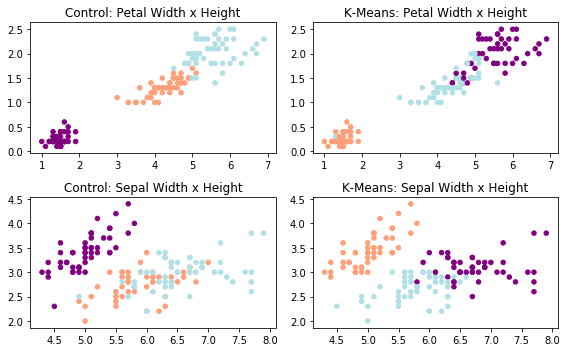

In [223]:
f = plt.figure(figsize=(8,5))

ax = f.add_subplot(2,2,1)
plt.scatter(x=iris_pd.Petal_Length, y=iris_pd.Petal_Width, c=color_theme[iris.target], s=20)
ax.set_title('Control: Petal Width x Height')

ax = f.add_subplot(2,2,2)
plt.scatter(x=iris_pd.Petal_Length, y=iris_pd.Petal_Width, c=color_theme[clustering.labels_], s=20)
ax.set_title('K-Means: Petal Width x Height')

ax = f.add_subplot(2,2,3)
plt.scatter(x=iris_pd.Sepal_Length, y=iris_pd.Sepal_Width, c=color_theme[iris.target], s=20)
ax.set_title('Control: Sepal Width x Height')

ax = f.add_subplot(2,2,4)
plt.scatter(x=iris_pd.Sepal_Length, y=iris_pd.Sepal_Width, c=color_theme[clustering.labels_], s=20)
ax.set_title('K-Means: Sepal Width x Height')

f.tight_layout()

A quick relabel...

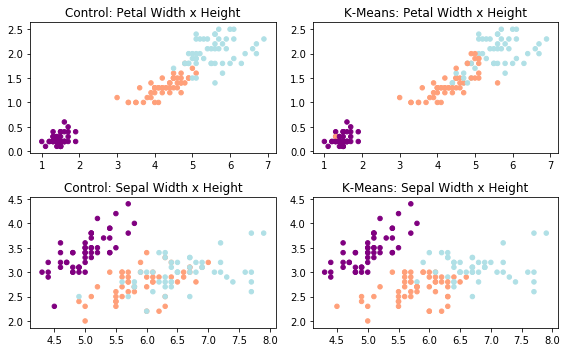

In [226]:
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)

f = plt.figure(figsize=(8,5))

ax = f.add_subplot(2,2,1)
plt.scatter(x=iris_pd.Petal_Length, y=iris_pd.Petal_Width, c=color_theme[iris.target], s=20)
ax.set_title('Control: Petal Width x Height')

ax = f.add_subplot(2,2,2)
plt.scatter(x=iris_pd.Petal_Length, y=iris_pd.Petal_Width, c=color_theme[relabel], s=20)
ax.set_title('K-Means: Petal Width x Height')

ax = f.add_subplot(2,2,3)
plt.scatter(x=iris_pd.Sepal_Length, y=iris_pd.Sepal_Width, c=color_theme[iris.target], s=20)
ax.set_title('Control: Sepal Width x Height')

ax = f.add_subplot(2,2,4)
plt.scatter(x=iris_pd.Sepal_Length, y=iris_pd.Sepal_Width, c=color_theme[relabel], s=20)
ax.set_title('K-Means: Sepal Width x Height')

f.tight_layout()

In [227]:
print(classification_report(test_data, relabel))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        50
          1       0.74      0.78      0.76        50
          2       0.77      0.74      0.76        50

avg / total       0.84      0.83      0.83       150



And as you can see it performs almost identically to the K-Means algorithm. Why might this be? My theory is that because spectral clustering is most effective at images and determining the background from the foreground, the embedding of the affinity matrix does little to nothing because of how spread out the data points are. This would make it effectively just the K-Means algorithm, which is why the results from the two tests are so similar. 
  
I will take this one step further and try the same optimization for the K-means, performing spectral clustering on only the petal measurements.

In [234]:
test_data_pd = pd.DataFrame(test_data)
test_data_pd.columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
clustering = SpectralClustering(n_clusters=3,assign_labels='discretize',random_state=0).fit(test_data_pd[['Petal_Width','Petal_Length']])

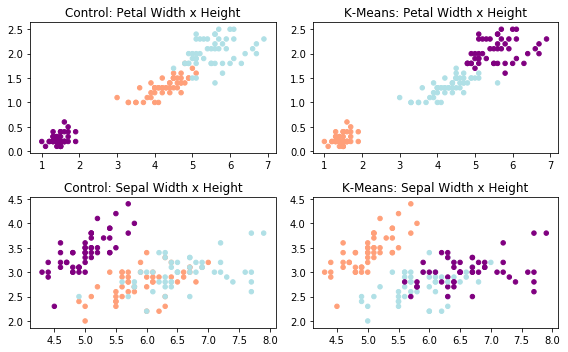

In [235]:
f = plt.figure(figsize=(8,5))

ax = f.add_subplot(2,2,1)
plt.scatter(x=iris_pd.Petal_Length, y=iris_pd.Petal_Width, c=color_theme[iris.target], s=20)
ax.set_title('Control: Petal Width x Height')

ax = f.add_subplot(2,2,2)
plt.scatter(x=iris_pd.Petal_Length, y=iris_pd.Petal_Width, c=color_theme[clustering.labels_], s=20)
ax.set_title('K-Means: Petal Width x Height')

ax = f.add_subplot(2,2,3)
plt.scatter(x=iris_pd.Sepal_Length, y=iris_pd.Sepal_Width, c=color_theme[iris.target], s=20)
ax.set_title('Control: Sepal Width x Height')

ax = f.add_subplot(2,2,4)
plt.scatter(x=iris_pd.Sepal_Length, y=iris_pd.Sepal_Width, c=color_theme[clustering.labels_], s=20)
ax.set_title('K-Means: Sepal Width x Height')

f.tight_layout()

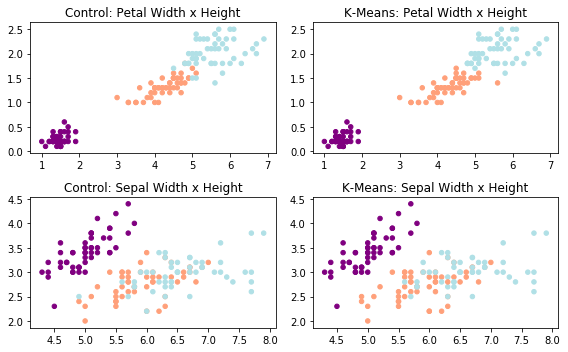

In [236]:
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)

f = plt.figure(figsize=(8,5))

ax = f.add_subplot(2,2,1)
plt.scatter(x=iris_pd.Petal_Length, y=iris_pd.Petal_Width, c=color_theme[iris.target], s=20)
ax.set_title('Control: Petal Width x Height')

ax = f.add_subplot(2,2,2)
plt.scatter(x=iris_pd.Petal_Length, y=iris_pd.Petal_Width, c=color_theme[relabel], s=20)
ax.set_title('K-Means: Petal Width x Height')

ax = f.add_subplot(2,2,3)
plt.scatter(x=iris_pd.Sepal_Length, y=iris_pd.Sepal_Width, c=color_theme[iris.target], s=20)
ax.set_title('Control: Sepal Width x Height')

ax = f.add_subplot(2,2,4)
plt.scatter(x=iris_pd.Sepal_Length, y=iris_pd.Sepal_Width, c=color_theme[relabel], s=20)
ax.set_title('K-Means: Sepal Width x Height')

f.tight_layout()

In [233]:
print(classification_report(control_data, relabel))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.92      0.96      0.94        50
          2       0.96      0.92      0.94        50

avg / total       0.96      0.96      0.96       150



Just as suspected, the spectral clustering performs identical to the K-means algorithm. This is most certainly because the low-dimension embedding of the affinity matrix does not contribute at all when performing the spectral cluster analysis. The entirety of the classification comes from the K-Means algorithm.

## DBSCAN (Bonus)

Unlike K-Means which assumes clusters are convex and based around a center point, DBSCAN finds clusters in data dense ares, with there borders being low density areas. This allows clusters detected by DBSCAN to be of all shapes and sizes. [3]

I predict DBSCAN will be ineffective when utilizing the iris data. This is because unlike K-Means and Spectral clustering, you cannot specify the number of clusters. DBSCAN comes up with its own estimate. I suspect, cluster 1 and 2 (of 0,1,2) will be mashed into a single cluster.  

Well there is only one way to find out.

In [237]:
from sklearn.cluster import DBSCAN

test_data_pd = pd.DataFrame(test_data)
test_data_pd.columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
clustering = DBSCAN(eps=1, min_samples=3).fit(test_data_pd)

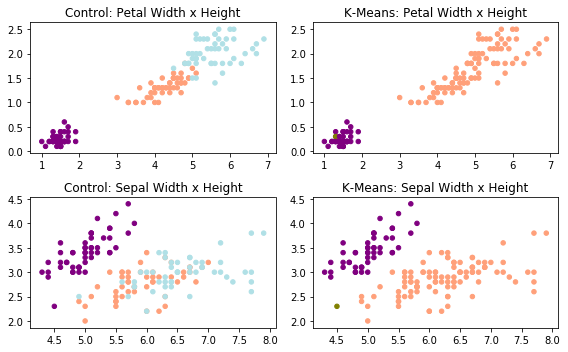

In [238]:
f = plt.figure(figsize=(8,5))

ax = f.add_subplot(2,2,1)
plt.scatter(x=iris_pd.Petal_Length, y=iris_pd.Petal_Width, c=color_theme[iris.target], s=20)
ax.set_title('Control: Petal Width x Height')

ax = f.add_subplot(2,2,2)
plt.scatter(x=iris_pd.Petal_Length, y=iris_pd.Petal_Width, c=color_theme[clustering.labels_], s=20)
ax.set_title('K-Means: Petal Width x Height')

ax = f.add_subplot(2,2,3)
plt.scatter(x=iris_pd.Sepal_Length, y=iris_pd.Sepal_Width, c=color_theme[iris.target], s=20)
ax.set_title('Control: Sepal Width x Height')

ax = f.add_subplot(2,2,4)
plt.scatter(x=iris_pd.Sepal_Length, y=iris_pd.Sepal_Width, c=color_theme[clustering.labels_], s=20)
ax.set_title('K-Means: Sepal Width x Height')

f.tight_layout()

As predicted cluster 1 and 2 were combine into a single cluster. Because there was no meaningful density separation between them, DBSCAN assumed they were merely the same cluster. Because of this im certain the accuracy of this prediction will be dismal.

In [239]:
print(classification_report(control_data, clustering.labels_))

             precision    recall  f1-score   support

         -1       0.00      0.00      0.00         0
          0       1.00      0.98      0.99        50
          1       0.50      1.00      0.67        50
          2       0.00      0.00      0.00        50

avg / total       0.50      0.66      0.55       150



C:\Users\Ernie\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ernie\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Citations

1) “2.3. Clustering.” 1.4. Support Vector Machines - Scikit-Learn 0.19.2 Documentation, scikit-learn.org/stable/modules/clustering.html#clustering. 

2) “A Demo of K-Means Clustering on the Handwritten Digits Data.” 1.4. Support Vector Machines - Scikit-Learn 0.19.2 Documentation, scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py. 

3) “Sklearn.cluster.DBSCAN.” 1.4. Support Vector Machines - Scikit-Learn 0.19.2 Documentation, scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN. 

4) “Spectral Clustering for Image Segmentation.” 1.4. Support Vector Machines - Scikit-Learn 0.19.2 Documentation, scikit-learn.org/stable/auto_examples/cluster/plot_segmentation_toy.html#sphx-glr-auto-examples-cluster-plot-segmentation-toy-py. 

5) TheEngineeringWorld. “K-Means Clustering - Methods Using Scikit-Learn in Python - Tutorial 23 in Jupyter Notebook.” YouTube, YouTube, 7 Sept. 2017, youtu.be/ikt0sny_ImY. 